# OPI ANALYTICS: Examen Ciencia de Datos L3/L4

### Solicitante: Darío Díaz Cuevas

### Fecha de entrega: 08/08/2021

In [2029]:
#importacion de librerias

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## SECCIÓN A

## Datos Abiertos de la CDMX

La Agencia Digital de Innovación Pública tiene disponibles datos de las carpetas de investigación aportados por la PGJ. La tabla está disponible aquí: https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico/resource/48fcb848-220c-4af0-839b-4fd8ac812c0f

Utilizando estos datos, responde las siguientes preguntas:

**1. ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas, sólo describe la prueba y lo que te dice cada una.**

El primer paso es asegurarse se que tienen los datos correctos: Al momento de consultar la liga a los datos, se identificó que la información corresponde a las carpetas de investigación de la Fiscalía General de Justicia (FGJ). Por otro lado, en las indicaciones se indica consultar las carpetas aportadas por la Procuradoría General de Justicia (PGJ), localizada en esta liga: https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-pgj-cdmx. 

Al revisar y comparar ambos conjuntos de datos, se encontró que ambas tablas son similares. Los campos en la tabla de datos correspondientes a la PGJ se encuentran presentes en la tabla de datos de la FJG. Similarmente, esta última tabla posee un mayor número de observaciones y contiene información más actualizada. Contiene registros para el año 2020, mientras que la tabla de datos de la PGJ posee información hasta 2019. Debido a esto y a la actual transición PGJ --> FGJ, se utiliza la tabla obtenida de la liga original.

Antes de comenzar a investigar cualquier tipo de interrogante sobre los datos, es conveniente echarles un vistazo para conocer su estructura. Para esto, se comienza por leer los datos y desplegar una porción de ellos, así como un resumen sobre los tipos de datos.

In [1631]:
#lectura del dataset de carpetas de investigacion
carp_inv = pd.read_csv('carpetas_completa_junio_2021.csv')

In [1632]:
#visualizacion de la tabla
carp_inv

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248919,2021.0,Junio,2021-06-29 17:00:00,2021,Junio,2021-06-30 23:32:31,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MILPA...,MIL-2,UI-3SD,DELITO DE BAJO IMPACTO,OAXTEPEC,NaN,SAN MARCOS (SANTA ANA TLACOTENCO),MILPA ALTA,FUERO COMUN,-98.992460,19.168371,NaN
1248920,2021.0,Junio,2021-06-04 19:00:00,2021,Junio,2021-06-30 23:36:45,ROBO DE ACCESORIOS DE AUTO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,CUH-7,UI-3SD,DELITO DE BAJO IMPACTO,AVENIDA MEXICO,TEOTIHUACAN,HIPÓDROMO,CUAUHTEMOC,FUERO COMUN,-99.168311,19.412001,NaN
1248921,2021.0,Junio,2021-06-30 19:40:00,2021,Junio,2021-06-30 23:37:12,AMENAZAS,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAC...,IZC-2,UI-3SD,DELITO DE BAJO IMPACTO,CUATRO,NaN,AGRÍCOLA PANTITLAN,IZTACALCO,FUERO COMUN,-99.061716,19.419028,NaN
1248922,2021.0,Mayo,2021-05-16 21:08:00,2021,Junio,2021-06-30 23:45:57,DAÑO EN PROPIEDAD AJENA INTENCIONAL,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,CUH-7,UI-3SD,DELITO DE BAJO IMPACTO,ALVARO OBREGON,NaN,ROMA NORTE,CUAUHTEMOC,FUERO COMUN,-99.158994,19.418615,NaN


A continuación se muestra el tamaño y tipo de datos en la tabla:

In [1633]:
print(f"La tabla contiene {carp_inv.shape[0]:,} observaciones y {carp_inv.shape[1]:,} columnas.")

La tabla contiene 1,248,924 observaciones y 19 columnas.


In [1634]:
#tipos de datos
carp_inv.dtypes

ao_hechos               float64
mes_hechos               object
fecha_hechos             object
ao_inicio                 int64
mes_inicio               object
fecha_inicio             object
delito                   object
fiscalia                 object
agencia                  object
unidad_investigacion     object
categoria_delito         object
calle_hechos             object
calle_hechos2            object
colonia_hechos           object
alcaldia_hechos          object
competencia              object
longitud                float64
latitud                 float64
tempo                   float64
dtype: object

Para asegurar la calidad de los datos, es necesario inspeccionar varios aspectos. 

Para comenzar, es importante identificar valores faltantes, sobre todo para el caso de variables necesarias para el análisis. En caso de haber valores faltantes, se debe determinar si su presencia es o no relevante, o admisible. Por ejemplo, en este dataset existe una columna llamada `tempo` cuyo valor único es `NaN`. Esta columna podría ser descartada ya que no aporta información alguna. Cuando se tienen valores faltantes en variables necesarias para uno o más análisis, debe definirse cómo proceder: Si la mayoría de observaciones en una o más variables es faltante, en ocasiones se deja fuera del análisis a dichas variables. En caso de que sólo una pequeña porción de los records de la tabla contenga valores faltantes, estos pueden omitirse en muchos casos. Cuando la omisión de observaciones con valores faltantes no es una opción y estos ocurren en un patrón aleatorio y en una cantidad moderada, puede recurrirse a la imputación. Existen diversos métodos que van desde imputación usando medidas de tendencia central, hasta predicción por interpolación o algoritmos de aprendizaje supervisado.

También es necesario revisar el tipo de datos, y formatos para fechas. Por ejemplo, en esta tabla de datos, el año de ocurrencia de los delitos está representado por un número flotante (2016.0, 2017.0, etc), mientras que el año de inicio de la investigación es entero (2016, 2017, etc.).

Otro chequeo que puede considerarse se relaciona con la unicidad de las observaciones. Dependiendo de los datos puede ser necesario verificar que no existan renglones duplicados. En todo caso, es conveniente tener o definir un campo o índice que permita identificar de manera única cada observación en la tabla.

Adicionalmente se debe revisar que los campos no contengan inconsistencias o valores inadmisibles que generalmente son el producto de errores de captura o procesamiento, como por ejemplo, años negativos, fechas o rangos de fechas sin sentido u orden temporal, tipos de datos mezclados (ejemplo: representar los meses con números del 1 al 12, y encontrar observaciones en donde se representan con texto), etc. La detección de anomalías no es lo mismo que la detección de outliers, y el proceso para determinar cuáles observaciones son producto de un error y cuales surgen simplemente a partir de la variabilidad de los datos, es rara vez claro. En mi opinión, eliminar observaciones atípicas durante el limpiado de datos no es lo más recomendabe, a menos que no exista duda alguna de que se trata de errores.

Finalmente, el proceso de limpieza y análisis de los datos no es lineal. Existen ocasiones en que primero se realizan pruebas para tener datos de calidad, y una vez que se está realizando el análisis y se va conociendo mejor la estructura de los datos, se identifican nuevos problemas o situaciones que requieren de nuevas pruebas de calidad y data cleaning.

**2. Identifica los delitos que van a la alza y a la baja en la CDMX (ten cuidado con los delitos con pocas ocurrencias).**

Los distintos registros de delitos contenidos en la tabla ocurren en distintas zonas del país. Si bien no existe un campo que indique la ciudad en la cual ocurrió el delito, el campo `alcaldia_hechos` permite identificar si éste ocurrió en la CDMX. Debido a que la ocurrencia de delitos en CDMX es abundante en la tabla, es posible obtener las 16 alcaldías de la CDMX como las primeras 16 observaciones del vector de alcaldías únicas. 

In [1891]:
#revision de alcaldias en la tabla mediante arreglo de valores únicos
print(list(carp_inv.alcaldia_hechos.unique()))

['BENITO JUAREZ', 'IZTAPALAPA', 'CUAUHTEMOC', 'TLAHUAC', 'IZTACALCO', 'GUSTAVO A MADERO', 'MIGUEL HIDALGO', 'TLALPAN', 'ALVARO OBREGON', 'VENUSTIANO CARRANZA', 'AZCAPOTZALCO', 'CUAJIMALPA DE MORELOS', 'COYOACAN', 'XOCHIMILCO', 'LA MAGDALENA CONTRERAS', 'MILPA ALTA', 'TLALNEPANTLA DE BAZ', 'VERACRUZ', 'IXCATEOPAN DE CUAUHTEMOC', 'TUXPAM', 'HUIXQUILUCAN', 'OCOYOACAC', 'ECATEPEC DE MORELOS', nan, 'SIN DATO', 'TULTEPEC', 'ACATZINGO', 'GUELATAO DE JUAREZ', 'HERMOSILLO', 'ENSENADA', 'IXTAPALUCA', 'NAUCALPAN DE JUAREZ', 'NEZAHUALCOYOTL', 'CHALCO', 'TLATLAYA', 'SAN JUAN GUICHICOVI', 'ZAPOPAN', 'SAN PEDRO IXTLAHUACA', 'NICOLAS ROMERO', 'VICTORIA', 'CULIACAN', 'VALLE DE CHALCO SOLIDARIDAD', 'TIANGUISTENCO', 'TEHUACAN', 'ACAPULCO DE JUAREZ', 'TEMASCALCINGO', 'CUAUTITLAN IZCALLI', 'TIJUANA', 'CUERNAVACA', 'TENANGO DEL VALLE', 'TULANCINGO DE BRAVO', 'CORREGIDORA', 'JUAREZ HIDALGO', 'CELAYA', 'CHICOLOAPAN', 'ATIZAPAN DE ZARAGOZA', 'TOLUCA', 'TORREON', 'TULTITLAN', 'BATOPILAS', 'MERIDA', 'HUEHUETOCA'

In [1636]:
#arreglo con alcaldias de la CDMX
alc_cdmx = carp_inv.alcaldia_hechos.unique()[:16]

Un vistazo al arreglo anterior de alcaldías únicas revela la existencia de valores faltantes representados tanto por `nan` como el valor `SIN DATO`. Habría que ver si ambos formatos para representar missing values simbolizan lo mismo, o si representan casos diferentes. También pueden apreciarse pocas alcaldías con irregularidades, tales como uso de minúsculas o nombres distorsionados producto del intento de usar acentos. En el caso del análisis que debe llevarse a cabo para esta prueba técnica no es vital investigar estas situaciones, pero es una buena práctica identificar y señalar las inconsistencias e irregularidades que van siendo encontradas.

A continuación, se crea un nuevo data frame únicamente con los delitos cometidos en alcaldías de la CDMX, y se transforma el año de ocurrencia del delito de `float` a `int`. Como este campo tiene valores faltantes, el valor del año se representará como 0 en dichos casos.

In [1637]:
#filtrado y creacion de tabla de delitos en cdmx
del_cdmx = carp_inv[carp_inv.alcaldia_hechos.isin(alc_cdmx)]
del_cdmx.reset_index(drop=True,inplace=True)

In [1638]:
#chequeo de valores unicos de años de ocurrencia de delitos
del_cdmx.ao_hechos.unique()

array([2016., 2015., 2012., 2014., 2011., 2008., 2006., 2010., 2013.,
       2005., 2009.,   nan, 1955., 2004., 2002., 1998., 1997., 1965.,
       2007., 1987., 1999., 1956., 2001., 1996., 1986., 1915., 1988.,
       2000., 2017., 2003., 1991., 1993., 1977., 1984., 1995., 1994.,
       1990., 1992., 1978., 1989., 1972., 2018., 2019., 1974., 1970.,
       1980., 1976., 1983., 1985., 1966., 1969., 1981., 1960., 1982.,
       1975., 1954., 1973., 1964., 1968., 1963., 1971., 1958., 1942.,
       1930., 1979., 1906., 1962., 1957., 2020., 1950., 1952., 2021.,
       1967.])

In [1640]:
#transformacion a int
del_cdmx.loc[:,'ao_hechos'] = del_cdmx.ao_hechos.fillna(0).astype(int)

Comparando las dimensiones de la tabla general de delitos y la de delitos en CDMX, es posible notar que la gran mayoría de los delitos ocurrieron o fueron registrados en la CDMX.

Para seguir con el análisis, se crean nuevas variables para representar numéricamente el mes de ocurrencia del delito, y la fecha como tipo `date`. Aquellas observaciones con mes faltante se representan por el valor 0.

In [1641]:
#creacion de variable numerica para el mes de ocurrencia del delito
#missing values se representan momentaneamente como el string 'na'
del_cdmx.insert(2,'mes_hechos_num',del_cdmx.mes_hechos.fillna('na') ) 

In [1642]:
#diccionario de meses y los numeros equivalentes, 'na' se representa por cero
meses = ["na","Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
d = dict(zip(meses,list(np.arange(13))))

#mapeo de mes a numero
del_cdmx.loc[:,'mes_hechos_num'] = del_cdmx.mes_hechos_num.apply(lambda mes: d[mes]).astype(int)

In [1643]:
#variable con fecha de delito en tipo date
del_cdmx.insert(4,'fecha_hechos_dt',pd.to_datetime( del_cdmx.fecha_hechos).dt.date)

Una vez insertadas las nuevas variables, ta tabla queda con la siguiente estructura:

In [1644]:
del_cdmx

,ao_hechos,mes_hechos,mes_hechos_num,fecha_hechos,fecha_hechos_dt,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,...,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016,Enero,1,2016-01-31 22:16:00,2016-01-31,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,...,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016,Enero,1,2016-01-31 20:50:00,2016-01-31,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,...,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016,Febrero,2,2016-02-01 00:30:00,2016-02-01,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",...,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016,Enero,1,2016-01-31 22:00:00,2016-01-31,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,...,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015,Diciembre,12,2015-12-25 12:00:00,2015-12-25,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,...,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235880,2021,Junio,6,2021-06-29 17:00:00,2021-06-29,2021,Junio,2021-06-30 23:32:31,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MILPA...,...,UI-3SD,DELITO DE BAJO IMPACTO,OAXTEPEC,NaN,SAN MARCOS (SANTA ANA TLACOTENCO),MILPA ALTA,FUERO COMUN,-98.992460,19.168371,NaN
1235881,2021,Junio,6,2021-06-04 19:00:00,2021-06-04,2021,Junio,2021-06-30 23:36:45,ROBO DE ACCESORIOS DE AUTO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,...,UI-3SD,DELITO DE BAJO IMPACTO,AVENIDA MEXICO,TEOTIHUACAN,HIPÓDROMO,CUAUHTEMOC,FUERO COMUN,-99.168311,19.412001,NaN
1235882,2021,Junio,6,2021-06-30 19:40:00,2021-06-30,2021,Junio,2021-06-30 23:37:12,AMENAZAS,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAC...,...,UI-3SD,DELITO DE BAJO IMPACTO,CUATRO,NaN,AGRÍCOLA PANTITLAN,IZTACALCO,FUERO COMUN,-99.061716,19.419028,NaN
1235883,2021,Mayo,5,2021-05-16 21:08:00,2021-05-16,2021,Junio,2021-06-30 23:45:57,DAÑO EN PROPIEDAD AJENA INTENCIONAL,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,...,UI-3SD,DELITO DE BAJO IMPACTO,ALVARO OBREGON,NaN,ROMA NORTE,CUAUHTEMOC,FUERO COMUN,-99.158994,19.418615,NaN


In [1645]:
print(f"La tabla contiene {del_cdmx.shape[0]:,} observaciones y {del_cdmx.shape[1]:,} columnas.")

La tabla contiene 1,235,885 observaciones y 21 columnas.


Una vez lista la tabla para los delitos en la CDMX, procedemos a ver el número de delitos por año, notando que existen 421 valores con cero, utilizado para representar delitos cometidos en años con valor faltante. Para fines de los ejercicios contenidos en esta prueba y considerando el número tan grande de observaciones en el data set, se decide omitir dichas observaciones por completo.

In [1646]:
#conteo de delitos por año
pd.DataFrame(del_cdmx['ao_hechos'].value_counts().sort_index()).rename(columns={'ao_hechos':'delitos'}).transpose()

,0,1906,1915,1930,1942,1950,1952,1954,1955,1956,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
delitos,421,1,2,1,1,2,1,1,3,2,...,1477,2087,4139,15582,192999,224650,251358,240970,198077,99443


In [1647]:
#eliminar observaciones correspondientes a año de hechos faltante
del_cdmx = del_cdmx[del_cdmx.ao_hechos > 0]

A partir del conteo anterior es posible observar que existen delitos cometidos en años lejanos en el pasado. Sin embargo, son muy pocos. La gran mayoría parecen estar concentrados en los últimos seis o siete años, como lo revela el resumen a continuación y el percentil 3 de la distribución de años, cuyo valor es 2016.

In [1648]:
#resumen de la distribución de años en que se cometieron delitos
#media y la desviación estándar redondeados al entero más cercano
del_cdmx.ao_hechos.describe().round().astype(int)

count    1235464
mean        2018
std            2
min         1906
25%         2017
50%         2018
75%         2019
max         2021
Name: ao_hechos, dtype: int32

In [1649]:
#percentil 3 %
int(np.quantile(a=del_cdmx.ao_hechos,q=0.03))

2016

El cambio tan dramático que se observa en el número de delitos al pasar del año 2015 al 2016 seguramente no se debe a que haya incrementado repentinamente y en un orden de magnitud la ocurrencia de delitos, sino al registro de ellos. Debido a esto, se considerarán para el resto del análisis únicamente delitos ocurridos del año 2016 hasta la fecha actual.

In [1650]:
#filtrado de delitos cuyo año de ocurrencia es menor a 2016
del_cdmx = del_cdmx[del_cdmx.ao_hechos>=2016]

#indice se reinicia
del_cdmx.reset_index(drop=True,inplace=True)

In [1651]:
print(f"La tabla contiene {del_cdmx.shape[0]:,} observaciones y {del_cdmx.shape[1]:,} columnas.")

La tabla contiene 1,207,497 observaciones y 21 columnas.


Una vez hecho esto, se procede a visualizar el número de delitos diarios ocurridos en la CDMX desde el comienzo del año 2016, en forma de serie de tiempo. La tabla contiene registros de delitos ocurridos hasta junio 30 de 2021.

In [1652]:
#rango de fechas resultante
print(f"La tabla contiene resgistros desde {min(del_cdmx.fecha_hechos_dt)} hasta {max(del_cdmx.fecha_hechos_dt)}.")

La tabla contiene resgistros desde 2016-01-01 hasta 2021-06-30.


In [1653]:
#para evitar tener que cambiar el nombre de las columnas en los agregados, se añade una columna dummy
#esta tiene el nombre 'delitos' y su proposito es que los agregados adquieran este nombre en automatico
del_cdmx.insert(0,'delitos', 1 )

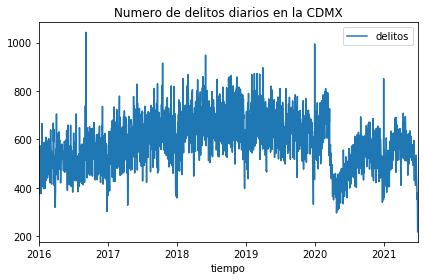

In [1654]:
#conteo de delitos por dia desde 2016 y grafico de serie de tiempo
del_cdmx[['fecha_hechos_dt','delitos']].groupby('fecha_hechos_dt').count().plot()
plt.xlabel("tiempo")
plt.title("Numero de delitos diarios en la CDMX")
plt.tight_layout()
plt.show()

La gráfica anterior muestra un cambio radical en el comportamiento de la serie de tiempo (punto de cambio) a comienzos del año 2020. Esto coincide con el tiempo de llegada de la pandemia de Covid-19 al país.

Al realizar un zoom considerando fechas desde 2020 y agregando un promedio movil de 10 días para suavizar un poco el ruido, se puede notar una oscilación con bajadas en tres momentos en el tiempo. La primera coincide con la llegada de la pandemia, la segunda con la segunda ola ocurrida en enero 2021, y la tercera con la tercera ola en la cual nos encontramos actualmente. La gráfica muestra de manera clara que actualmente existe una tendencia a la baja en el número de delitos totales en la CDMX. La linea vertical roja marca el primero de mayo de 2021, y se observa que posterior a esta fecha la frecuencia de delitos decrece.

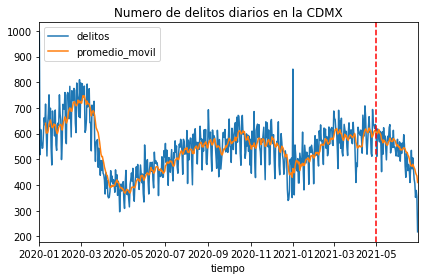

In [1655]:
#conteo de delitos por dia desde 2020 y grafico de serie de tiempo
trend = del_cdmx[['fecha_hechos_dt','delitos']][del_cdmx['fecha_hechos_dt']>=pd.Timestamp(2020,1,1)].groupby('fecha_hechos_dt').count()

#generar promedio movil con una ventana de tiempo de 10 dias y graficar
trend['promedio_movil'] = trend.rolling(window=10).mean()
trend.plot()
plt.xlabel("tiempo")
plt.title("Numero de delitos diarios en la CDMX")
plt.axvline(x=pd.Timestamp(2021,5,1),ymin = 0, ymax = 1, color='red',ls='--')
plt.tight_layout()
plt.show()

Con el objetivo de identificar tendencias actuales para distintos tipos de delitos, se determina considerar datos correspondientes a los últimos dos meses.

Antes de determinar qué tipos de delitos están a la alta y baja, se inspecciona el número total de delitos por tipo, ocurridos desde Mayo 1 hasta Junio 30 de 2021, y también el promedio de delitos diarios por tipo. Como se tienen 242 tipos de delitos cometidos desde Mayo 1, se muestran solo los 20 más frecuentes y los 20 menos frecuentes.

In [1656]:
#filtrado de delitos desde Mayo 2021 y conteo por tipo de delito
del_cdmx[['delito','delitos']][del_cdmx['fecha_hechos_dt']>=pd.Timestamp(2021,5,1)].groupby('delito').count().sort_values('delitos',ascending = False).head(20)

,delitos
delito,
VIOLENCIA FAMILIAR,5306
AMENAZAS,2606
FRAUDE,1695
ROBO DE OBJETOS,1528
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,1323
ROBO DE ACCESORIOS DE AUTO,1316
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,945
ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO),926
NARCOMENUDEO POSESION SIMPLE,636


In [1657]:
#filtrado de delitos desde Mayo 2021 y conteo por tipo de delito
del_cdmx[['delito','delitos']][del_cdmx['fecha_hechos_dt']>=pd.Timestamp(2021,5,1)].groupby('delito').count().sort_values('delitos',ascending = False).tail(20)

,delitos
delito,
VIOLACION TUMULTUARIA EQUIPARADA,1
TRAFICO DE INFLUENCIA,1
DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A VIAS DE COMUNICACION,1
PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL),1
ROBO A SUCURSAL BANCARIA CON VIOLENCIA,1
ROBO DE VEHICULO DE SERVICIO OFICIAL CON VIOLENCIA,1
ROBO DE MAQUINARIA CON VIOLENCIA,1
ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) SIN VIOLENCIA,1
ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,1


Muchos tipos de delitos tienen muy pocas ocurrencias en dos meses. Para analizar las tendencias acutuales, el análisis se restringe a aquellos tipos de delitos que han ocurrido diariamente en el periodo de Mayo 1 a Junio 30. Estos tipos de delitos son 20 y se muestran a continuación, acompañados de la frecuencia diaria promedio con la que ocurrieron en el periodo de Mayo 1 a Junio 30, redondeada al entero más cercano.

In [1658]:
#se seleccionan las variables de tipo de delito, fecha, y la variable dummy, con el filtro de fechas
del_trend = del_cdmx[['delito','fecha_hechos_dt','delitos']][del_cdmx['fecha_hechos_dt']>=pd.Timestamp(2021,5,1)]

#se agrupa la tabla por tipo de delito y fecha, y se hace un conteo de numero de delitos
#se resetea el indice para tener los indices como valores
del_trend = del_trend.groupby(['delito','fecha_hechos_dt']).count().reset_index()

#agrupando por tipo de delito se cuenta el numero de dias en el periodo Mayo 1 - Junio 30 en donde hubo ocurrencia
#tambien se calcula el numero promedio de delitos por dia
del_trend = del_trend[['delito','delitos']].groupby('delito').agg(['count','mean'])

#se seleccionan unicamente los tipos de delito con ocurrencia diaria en todo el periodo Mayo 1 - Junio 30 (61 dias)
#se muestra el promedio de incidencias diarias
del_trend = del_trend['delitos'][del_trend['delitos']['count']==61][['mean']].sort_values('mean',ascending=False)
del_trend.round().astype(int)

,mean
delito,
VIOLENCIA FAMILIAR,87
AMENAZAS,43
FRAUDE,28
ROBO DE OBJETOS,25
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,22
ROBO DE ACCESORIOS DE AUTO,22
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,15
ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO),15
NARCOMENUDEO POSESION SIMPLE,10


Una vez identificados estos delitos, es posible evaluar su tendencia en los últimos dos meses visualmente mediante un gráfico y un promedio móvil con ventana de tiempo de 7 días, para suavizar el ruido. Por ejemplo, para el caso del delito de violencia familiar, se tiene la siguiente serie de observaciones diarias, en donde se puede apreciar una tendencia clara a la baja.

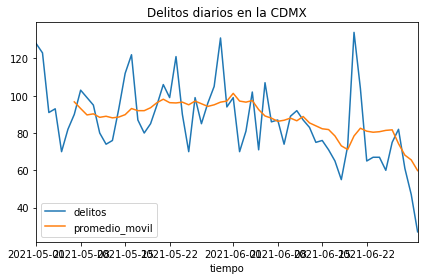

In [1659]:
#conteo de delitos de violencia familiar por dia desde Mayo 2021 y grafico de serie de tiempo
trend = del_cdmx[['fecha_hechos_dt','delitos']][(del_cdmx['fecha_hechos_dt']>=pd.Timestamp(2021,5,1)) & (del_cdmx['delito'] == "VIOLENCIA FAMILIAR")].groupby('fecha_hechos_dt').count()

#generar promedio movil con una ventana de tiempo de 10 dias y graficar
trend['promedio_movil'] = trend.rolling(window=7).mean()
trend.plot()
plt.xlabel("tiempo")
plt.title("Delitos diarios en la CDMX")
plt.tight_layout()
plt.show()

Si bien es posible apreciar tendencias de manera visual, es conveniente buscar una cantidad que exprese la fuerza y dirección de dicha tendencia para cada uno de los delitos de interés.

Para esto, se propone utilizar regresión lineal. El modelo de regresión lineal no es el ideal para el análisis de series de tiempo, principalmente debido a la autocorrelación entre observaciones que rompe con supuestos distribucionales y distorsiona los p-values y potencias en las pruebas de significancia usuales. Sin embargo, esta técnica sí es utilizada comunmente con el objetivo de estimar tendencias.

Por tanto, para cada uno de los 20 delitos anteriores se ajusta el modelo de regresión lineal simple

$$
\mathbb{E}(y_i) = \beta_0 + \beta_1 t_i
$$

por mínimos cuadrados (usando `sklearn`), y se obtienen el valor estimado de la pendiente y el cuadrado del coeficiente de correlación de Pearson, que en el caso de la regresión lineal simple es igual al coeficiente de determinación $R^2$.

Para esto, se construye una tabla con el número de delitos diarios desde Mayo 1 hasta Junio 30 de 2021 (61 dias en total), por tipo de delito y fecha.

In [1660]:
#delitos con indicencias diarias
del_diarios = pd.Series(del_trend.index)

#data set con numero de delitos por tipo de delito y fecha
#se seleccionan las variables de tipo de delito, fecha, y la variable dummy, con el filtro de fechas y delitos
df_tendencias = del_cdmx[['delito','fecha_hechos_dt','delitos']][(del_cdmx['fecha_hechos_dt']>=pd.Timestamp(2021,5,1))&(del_cdmx['delito'].isin(del_diarios))]

#se agrupa la tabla por tipo de delito y fecha, y se hace un conteo de numero de delitos
#se resetea el indice para tener los indices como valores
df_tendencias = df_tendencias.groupby(['delito','fecha_hechos_dt']).count().reset_index()
df_tendencias

,delito,fecha_hechos_dt,delitos
0,ABUSO SEXUAL,2021-05-01,8
1,ABUSO SEXUAL,2021-05-02,11
2,ABUSO SEXUAL,2021-05-03,12
3,ABUSO SEXUAL,2021-05-04,11
4,ABUSO SEXUAL,2021-05-05,9
...,...,...,...
1215,VIOLENCIA FAMILIAR,2021-06-26,75
1216,VIOLENCIA FAMILIAR,2021-06-27,82
1217,VIOLENCIA FAMILIAR,2021-06-28,61
1218,VIOLENCIA FAMILIAR,2021-06-29,47


Posteriormente se define una funcion que admite el tipo de delito, y devulve la pendiente y $R^2$ resultantes del ajuste por mínimos cuadrados del modelo lineal a la serie de delitos diarios.

In [1661]:
#funcion con tipo de delito como unico parametro
def tendencia(tipo_delito):
#filtrado de la tabla anterior por tipo de delito
    df = df_tendencias[df_tendencias['delito']==tipo_delito]
#ajuste de modelo lineal
    lm = LinearRegression().fit(X = np.arange(0,61).reshape(-1,1),y=df.delitos)
#se devuelven pendiente y R^2 en una lista
    return [lm.coef_[0] , lm.score(X = np.arange(0,61).reshape(-1,1),y=df.delitos)]

Por último, se aplica la función anterior a cada tipo de delito y se construye una tabla con cada tipo, y sus correspondientes estadísticos calculados a partir de cada modelo de regresión ajustado, redondeados a dos decimales. Los resultados se ordenan de menor a mayor pendiente. Recordemos que una pendiente positiva puede indicar una tendencia a la alza, y una negativa una tendencia a la baja.

In [1662]:
#se crea data frame para almacenar la informacion
tendencias = pd.DataFrame()
tendencias['delito'] = df_tendencias['delito'].unique()

#se mapea la funcion anterior y se almacenen los estimados en el data frame redondeados a dos decimales
#ordenando de menor a mayor pendiente
estimados = pd.DataFrame(tendencias['delito'].apply(func=tendencia).to_list(), columns=['pendiente', 'coef_determinacion']).round(2)
tendencias = pd.concat([tendencias,estimados],axis=1).sort_values('pendiente')
tendencias

,delito,pendiente,coef_determinacion
19,VIOLENCIA FAMILIAR,-0.57,0.24
1,AMENAZAS,-0.41,0.42
5,FRAUDE,-0.26,0.13
15,ROBO DE OBJETOS,-0.12,0.10
14,ROBO DE ACCESORIOS DE AUTO,-0.11,0.12
4,DESPOJO,-0.11,0.30
9,ROBO A NEGOCIO SIN VIOLENCIA,-0.09,0.17
12,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,-0.08,0.06
0,ABUSO SEXUAL,-0.07,0.17
8,ROBO A CASA HABITACION SIN VIOLENCIA,-0.06,0.10


La tabla anterior revela que la mayoría de los delitos considerados poseen pendientes negativas. Esto sugiere tendencias a la baja. Sin embargo, varias pendientes estimadas son muy cercanas a cero. Los coeficientes de determinación son en general muy pequeños, por lo cual sólo una pequeña porción de la variabilidad de los datos se explica por el modelo de regresión. Esto se debe en gran parte al ruido y a la existencia de tendencias no lineales. El interés es en realidad identificar tendencias a la baja o alta, por lo cual aún pendientes pequeñas pueden ser consideradas si van acompañadas de un coeficiente de determinación no tan cercano a cero.

Lo ideal cuando se utilizan modelos de regresión lineal es hacer uso de la inferencia para construir intervalos de confianza y probar hipótesis. Desafortunadamente en este caso no pueden emplearse pruebas de significancia como se mencionó antes, debido a la autocorrelación de las observaciones y a que se tienen datos de conteo, lo cual viola la suposición de normalidad en la cual se basan las pruebas $F$ y $t$ comunmente usadas para evaluar el ajuste de la regresión. Sin embargo, podemos inspeccionar los delitos con las seis pendientes más negativas, que son superiores a 0.1 en valor abosluto, y cuyo $R^2$ también es superior a 0.1.

En las graficas siguientes, pueden apreciarse en mayor o menor grado las tendencias a la baja actuales para estos seis tipos de delitos.

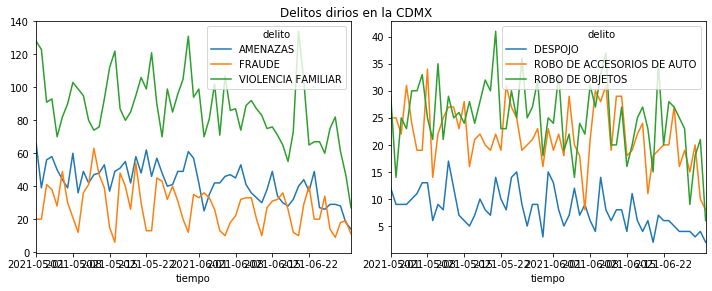

In [1663]:
#figura y ejes para plots acomodados en un renglon y dos columnas
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4)) 

#tabla tipo pivot para acomodar los datos de manera adecuada para graficarlos separando por columnas los delitos
#y asi poder graficar los conteos en colores diferentes
#debido a las escalas, se muestran separadas las graficas
df_tendencias[df_tendencias.delito.isin(tendencias.delito[:3])].pivot(index='fecha_hechos_dt', columns='delito', values='delitos').plot(ax=ax1)
ax1.set_xlabel("tiempo")
df_tendencias[df_tendencias.delito.isin(tendencias.delito[3:6])].pivot(index='fecha_hechos_dt', columns='delito', values='delitos').plot(ax=ax2)
ax2.set_xlabel("tiempo")
plt.tight_layout()
fig.suptitle("Delitos dirios en la CDMX").set_y(1)
plt.show()

Similarmente, se repite el procedimiento para los delitos con pendiente positiva. Sin embargo, nótese en la tabla que el valor de las pendientes estimadas para estos dos tipos de delito, son muy cercanas a cero. La gráfica que se muestra a continuación no parece mostrar una tendencia notoria en ninguno de los casos.

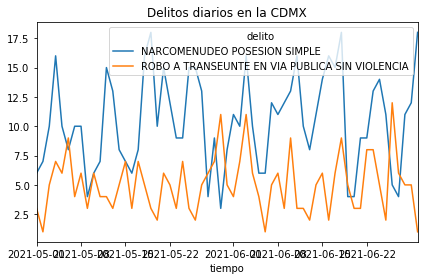

In [1664]:
#tabla tipo pivot para acomodar los datos de manera adecuada para graficarlos separando por columnas los delitos
#y asi poder graficar los conteos en colores diferentes
#debido a las escalas, se muestran separadas las graficas
df_tendencias[df_tendencias.delito.isin(tendencias.delito[-2:])].pivot(index='fecha_hechos_dt', columns='delito', values='delitos').plot()
plt.title("Delitos diarios en la CDMX")
plt.xlabel("tiempo")
plt.tight_layout()
plt.show()

Hay otros dos casos interesantes, y es el de delitos de abuso sexual y robo a negocio sin violencia, que tienen una pendiente estimada pequeña, pero un $R^2$ de los más altos de la tabla. Al graficarlos se aprecia una tendencia a la baja.

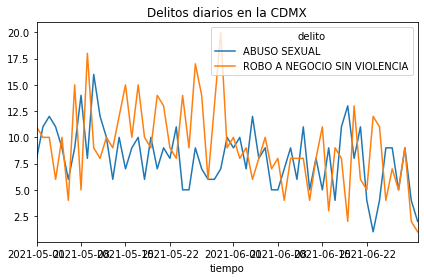

In [1665]:
#tabla tipo pivot para acomodar los datos de manera adecuada para graficarlos separando por columnas los delitos
#y asi poder graficar los conteos en colores diferentes
#debido a las escalas, se muestran separadas las graficas
df_tendencias[df_tendencias.delito.isin(["ABUSO SEXUAL","ROBO A NEGOCIO SIN VIOLENCIA"])].pivot(index='fecha_hechos_dt', columns='delito', values='delitos').plot()
plt.title("Delitos diarios en la CDMX")
plt.xlabel("tiempo")
plt.tight_layout()
plt.show()

Con base en el análisis anterior, se concluye que del conjunto de los 20 delitos con incidencia diaria en la CDMX en el periodo de Mayo 1 a Junio 30 de 2021, los delitos de violencia familiar, amenazas, fraude, despojo, robo de accesorios de auto, robo de objetos, abuso sexual, y robo a negocio sin violencia, se encuentran actualmente a la baja. Por otro lado, no se identificaron delitos a la alta.

**3. ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos? ¿Por qué crees que sea
esto?**

La gráfica siguiente contiene los conteos de delitos por alcaldía en la CDMX, revelando que la alcaldía Cuauhtémoc tiene la mayor incidencia de delitos. Por el contrario, Milpa Alta es la alcaldía con menos delitos en la CDMX.

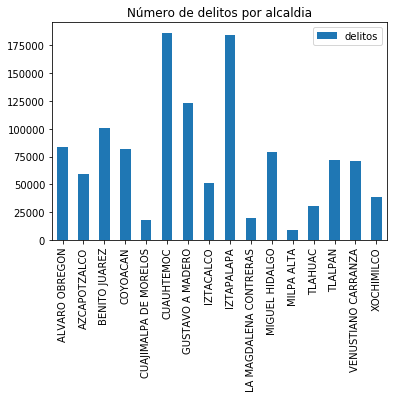

In [1666]:
#conteo de delitos por alcaldia usando la columna dummy
del_cdmx[['alcaldia_hechos','delitos']].groupby('alcaldia_hechos').count().plot.bar()
plt.xlabel(None)
plt.title("Número de delitos por alcaldia")
plt.show()

Una búsqueda rápida revela que la población de la alcaldía Cuauhtémoc es aproximadamente cuatro veces mayor que la de Milpa Alta. Es natural que esta diferencia en poblaciones tenga un impacto importante en el número de delitos ocurridos, pero no parece ser es suficiente para explicar la diferencia tan dramática en el número de delitos que existe entre ambas alcaldías. Para conocer un poco más del tipo de delitos que se cometen, se cuentan y grafican los 10 delitos más frecuentes en cada alcaldía.

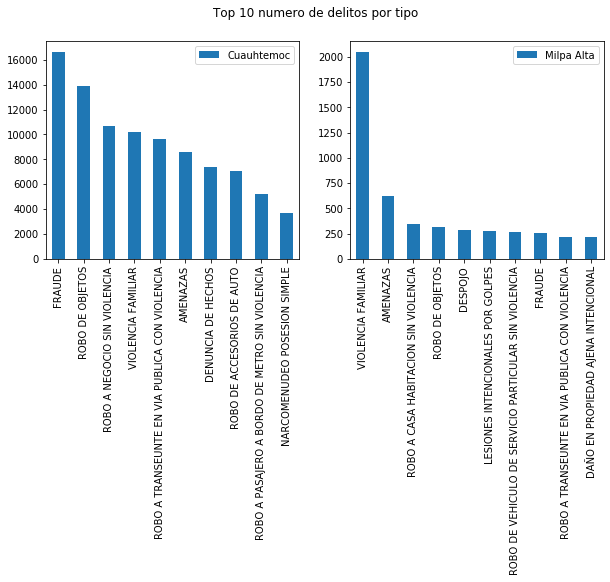

In [1667]:
#figura y ejes para plots acomodados en un renglon y dos columnas
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4)) 
del_cdmx[['delito','delitos']][del_cdmx['alcaldia_hechos']=="CUAUHTEMOC"].groupby('delito').count().sort_values('delitos',ascending=False).head(10).plot.bar(ax= ax1)
ax1.set_xlabel(None)
ax1.legend(["Cuauhtemoc"])
del_cdmx[['delito','delitos']][del_cdmx['alcaldia_hechos']=="MILPA ALTA"].groupby('delito').count().sort_values('delitos',ascending=False).head(10).plot.bar(ax= ax2)
ax2.set_xlabel(None)
ax2.legend(["Milpa Alta"])
fig.suptitle("Top 10 numero de delitos por tipo").set_y(1)
plt.show()

Puede apreciarse que el delito más reportado en la alcaldía Cuauhtémoc es el fraude, delito que abarca una gran variedad de situaciones. Además es muy abundante el delito de robo en varias de sus versiones, componiendo la mitad de los elementos en la lista de delitos más frecuentes. Esta alcaldía es una de las zonas más densamente pobladas en la CDMX, posee una gran afluencia de personas debido a su localización central en la ciudad, y a la presencia de corporativos y sitios de una intensa actividad laboral y comercial. El tráfico vehicular en la zona es generalmente pesado, existen múltiples estaciones de distintas lineas de metro, paraderos de autobuses, flujo peatonal, etc. Así mismo, es una de las principales áreas turísticas y recreativas de la ciudad, y posee mayor vigilancia. Existen también en la Cuauhtémoc colonias bien conocidas por ser inseguras. Todos estos factores pueden explicar el alto número de delitos y los tipos más frecuentes.

Por otra parte, Milpa Alta tiene una de las menores densidades de población, tiene baja urbanización, y se encuentra en el extremo sureste de la CDMX. La mayor parte de los delitos cometidos en dicha alcaldía se clasifican como violencia familiar, y los tipos de delitos restantes ocurren en mucho menor frecuencia. Aún cuando la densidad poblacional es baja, el número de delitos me parece aún así bajo aún para una alcaldía entera. Esto podría deberse a que muchos delitos no estén siendo registrados, lo cual ocurre con frecuencia en zonas con alta marginación y poca vigilancia. Por el contrario, se pensaría que en la alcaldía Cuauhtémoc un mayor número de delitos son denunciados y registrados con éxito.

**4. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la
semana, quincenas) en la CDMX? ¿A qué crees que se deba?**

Así como pudo ser apreciado en la gráfica de delitos totales diarios ocurridos en la CDMX desde el año 2016, es importante recordar que la dinámica de los delitos en la CDMX ha experimentado cambios debido al arribo de la pandemia de Covid-19. La presencia y evolución de la pandemia van dando forma a las dinámicas en fenómenos sociales.

Para detectar el comportamiento "usual" de los delitos en la CDMX, serán considerados los datos de los años 2016, 2017, 2018 y 2019. Nuevamente se grafican los datos y se acompañan de un suavizamiento utilizando un promedio movil con ventana de 30 para que la señal no se pierda entre el ruido. A primera vista, se puede identificar una clara tendencia, y al menos una componente estacional con periodo de un año. Principalmente llaman la atención aquellos picos hacia abajo que parecen ocurrir en la transición entre años. El spread de las observaciones parece permanecer estable a lo largo del tiempo, por lo cual no hay que aplicar logaritmos y otras transformaciones para estabilizar la varianza.

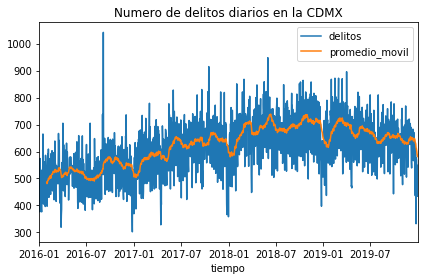

In [1758]:
#conteo de delitos en 2016, 2017, 2018 y 2019 y grafico de serie de tiempo
trend_est = del_cdmx[['fecha_hechos_dt','delitos']][(del_cdmx['fecha_hechos_dt']>=pd.Timestamp(2016,1,1))&(del_cdmx['fecha_hechos_dt']<pd.Timestamp(2020,1,1))].groupby('fecha_hechos_dt').count()

#generar promedio movil con una ventana de tiempo de 30 dias y graficar
trend_est['promedio_movil'] = trend_est.rolling(window=30).mean()
trend_est.plot()
plt.xlabel("tiempo")
plt.title("Numero de delitos diarios en la CDMX")
plt.tight_layout()
plt.show()

Debido a la gran cantidad de observaciones, es posible inspeccionar la existencia de una componente estacional anual más a detalle utilizando boxplots como se muestra a continuación.

In [1759]:
#reset de indices para obtener la fecha como columna
trend_est.reset_index(inplace=True)

#extraccion de mes en formato numero (1-12), se guarda en nueva columna
trend_est.insert(loc=1,column='mes',value=pd.Series([dt.month for dt in trend_est.fecha_hechos_dt ]))

#se fijan de nuevo las fechas como indices, esto es conveniente para hacer los plots
trend_est.set_index(trend_est.fecha_hechos_dt,inplace=True,drop=True)
trend_est = trend_est.iloc[:,1:]

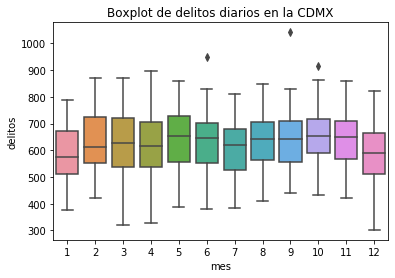

In [1760]:
#grafico de boxplot (caja y bigotes)
sns.boxplot(data=trend_est,x='mes',y='delitos')
plt.title("Boxplot de delitos diarios en la CDMX")
plt.show()

Los boxplots revelan una oscilación que coincide con lo observado en la serie de tiempo. Esto refuerza la idea sobre la existencia de una componente estacional de periodo igual a 12 meses.

Otra herramienta que puede usarse para diagnosticar estacionalidad es la autocorrelación, mostrada en el siguiente gráfico.

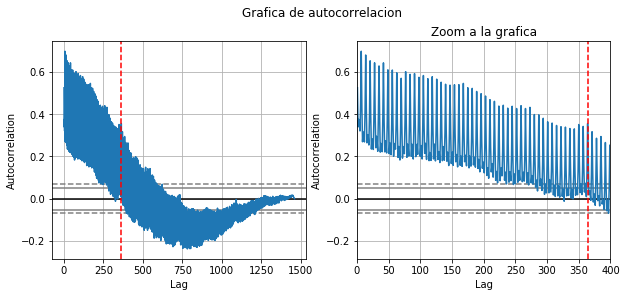

In [1761]:
#figura y ejes para plots acomodados en un renglon y dos columnas
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4)) 

#grafica de autocorrelacion
pd.plotting.autocorrelation_plot(trend_est.delitos,ax=ax1)
ax1.axvline(x=365,ymin = 0, ymax = 1, color='red',ls='--')
pd.plotting.autocorrelation_plot(trend_est.delitos,ax=ax2)
ax2.set_xlim(0,400)
ax2.axvline(x=365,ymin = 0, ymax = 1, color='red',ls='--')
ax2.set_title("Zoom a la grafica")
fig.suptitle("Grafica de autocorrelacion").set_y(1)
plt.show()


La información dada por la gráfica de autocorrelación revela mucho sobre la serie de delitos en la CDMX. Primeramente, las bandas alrededor del nivel cero en el eje vertical son aquellas que delimitan niveles de autocorrelación que no son significativos. Esto debe tomarse con reserva en esta situación ya que hay supuestos distribucionales de normalidad que se encuentran detrás, y en este caso se cuenta con datos de conteo, violando dicho supuesto y dificultando la aplicación de métodos de inferencia estadísticos. Sin embargo, las autocorrelaciones calculadas dan evidencia sobre los componentes previmente identificados en la serie, además de nuevos descubrimientos.

En la gráfica de la izquierda, se percibe cómo la autocorrelación persiste a lags grandes, y experimenta una oscilación y pasa de valores positivos a negativos. Esto es una clara evidencia de la presencia de una componente de tendencia, la cual se aprecia sin problemas en la serie de tiempo. Existen también multiples picos. Uno de ellos ocurre a un lag igual a 365 días (1 año aprox.), marcado con una línea roja punteada. A partir del gráfico derecho y del zoom mostrado del lado izquierdo, se obtiene evidencia un efecto una componente estacional de periodo anual, y se identifica la existencia de componentes estacionales con periodos más pequeños.

Cuando se tiene una serie de tiempo con tendencia y componente estacional, es posible remover una porción de ambas componentes utilizando diferenciación sobre la serie con el periodo adecuado. En este caso, se usa un periodo de 365 días con el fin de reducir la componente anual. Se utilizan nuevamente boxplots sobre la serie diferenciada, y observa cómo las cajas se encuentran más o menos al mismo nivel.

In [1762]:
#se agrega a la tabla la diferenciacion de la serie con un lag de 365 dias
trend_est.insert(loc=len(trend_est.columns),column='delitos_dif_anio',value=trend_est.delitos.diff(periods=365))

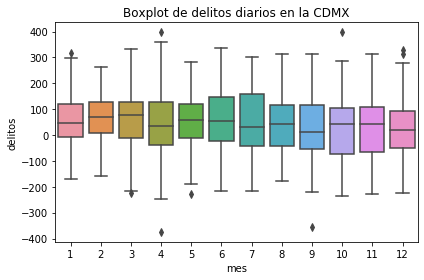

In [1763]:
#grafico de boxplot (caja y bigotes)
sns.boxplot(data=trend_est,x='mes',y='delitos_dif_anio')
plt.title("Boxplot de delitos diarios en la CDMX")
plt.ylabel("delitos")
plt.tight_layout()

Por último, haciendo un zoom mayor a la gráfica de autocorrelación anterior, se puede notar de manera muy clara un patrón de periodo igual a 7 días, revelándose así una componente estacional semanal que no era evidente de ver la serie completa.


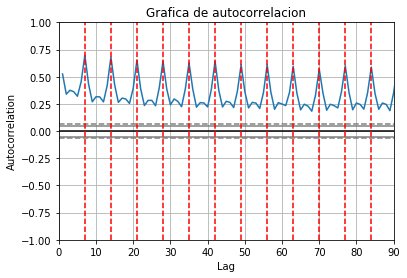

In [1764]:
#grafica de autocorrelacion
#se muestran lags solo hasta 90 dias para no perder el detalle de la grafica
pd.plotting.autocorrelation_plot(trend_est.delitos)

#se grafican las lineas verticales
for i in range(1,13):
    plt.axvline(x=7*i,ymin = 0, ymax = 1, color='red',ls='--')
plt.title("Grafica de autocorrelacion")
plt.xlim(0,90)
plt.show()

Se grafican también los boxplots para el día de la semana, antes y despues de diferenciar la serie usando un periodo de 7 días. La diferencia entre ambas gráficas es dramática. La diferenciación parece remover casi por completo la componente estacional semanal.

In [1765]:
#reset de indices para obtener la fecha como columna
trend_est.reset_index(inplace=True)

#extraccion de dia de la semana en formato numero (0 = lunes - 6 = domingo), se guarda en nueva columna
trend_est.insert(loc=1,column='dia_de_semana',value=pd.Series([dt.weekday()  for dt in trend_est.fecha_hechos_dt ]))

#se fijan de nuevo las fechas como indices, esto es conveniente para hacer los plots
trend_est.set_index(trend_est.fecha_hechos_dt,inplace=True,drop=True)
trend_est = trend_est.iloc[:,1:]

In [1766]:
#se agrega a la tabla la diferenciacion de la serie con un lag de 7 dias
trend_est.insert(loc=len(trend_est.columns),column='delitos_dif_semana',value=trend_est.delitos.diff(periods=7))

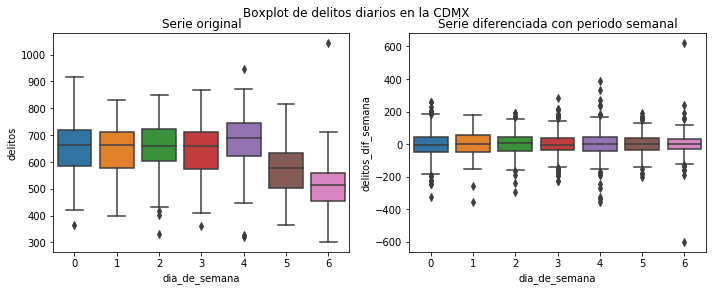

In [1767]:
#figura y ejes para plots acomodados en un renglon y dos columnas
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4)) 

#grafico de boxplot (caja y bigotes)
sns.boxplot(data=trend_est,x='dia_de_semana',y='delitos',ax=ax1)
ax1.set_title("Serie original")
sns.boxplot(data=trend_est,x='dia_de_semana',y='delitos_dif_semana',ax=ax2)
ax2.set_title("Serie diferenciada con periodo semanal")
plt.tight_layout()
fig.suptitle("Boxplot de delitos diarios en la CDMX").set_y(1)
plt.show()

Finalmente, se grafica la serie diferenciada y se muestra su autocorrelograma. Tras realizar este procedimiento, idealmente se espera llegar a una serie estacionaria, es decir, nivel y varianza constantes, y autocorrelaciones pequeñas que decaen más rápidamente a cero.

Con base en lo que se observa en la gráficas, la serie resultante es similar a una serie estacionaria. La serie se ha nivelado, la varianza permanece estable, y la autocorrelación está mucho más contenida dentro de las bandas de confianza.

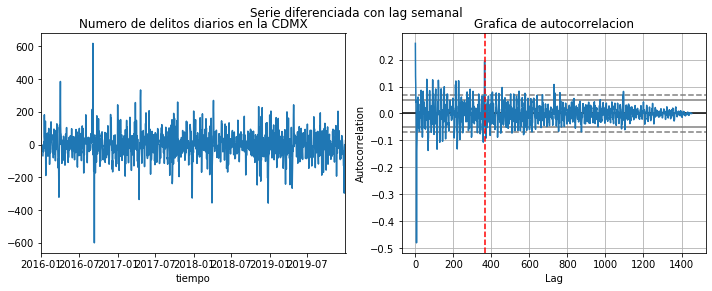

In [2066]:
#figura y ejes para plots acomodados en un renglon y dos columnas
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4)) 

#graficar serie diferenciada
trend_est['delitos_dif_semana'].plot(ax=ax1)
ax1.set_xlabel("tiempo")
ax1.set_title("Numero de delitos diarios en la CDMX")
#grafica de autocorrelacion
#se muestran lags solo hasta 90 dias para no perder el detalle de la grafica
pd.plotting.autocorrelation_plot(trend_est.delitos_dif_semana[trend_est.delitos_dif_semana.isna() == False ],ax=ax2)
ax2.set_title("Grafica de autocorrelacion")
fig.suptitle("Serie diferenciada con lag semanal").set_y(1)
ax2.axvline(x=365,ymin = 0, ymax = 1, color='red',ls='--')
plt.tight_layout()
plt.show()

Podría ser el caso que la serie tenga alguna otra componente estacional que pueda aun ser identificada, tal como una componente quincenal, trimestral, etc. Por ahora y por cuestiones de tiempo limitado, se limita el análisis a estos resultados y se concuye que los delitos diarios en la CDMX contienen tanto una componente anual como una semanal, que pueden ser removidas sencillamente por diferenciacion en el caso en que necesite tenerse una serie estacionaria para fines de predicción.

**5. ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que
suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.**

Para resolver esto, primero se construye una pivot table (similar a una tabla dinamica en Excel) a partir de una tabla de conteos, usando pandas para tener los conteos acomodados de manera que el elemento $n_{ij}$ de la tabla represente el número de delitos del tipo $j$ cometidos en la alcaldía $i$.

In [1895]:
#tabla de conteos de delitos por alcaldia y tipo de delito
#reseteamos indice para tener la alcaldia y tipo de delito como columna
alc_del = del_cdmx[['alcaldia_hechos','delito','delitos']].groupby(['alcaldia_hechos','delito']).count().reset_index()

In [1896]:
alc_del

,alcaldia_hechos,delito,delitos
0,ALVARO OBREGON,ABANDONO DE PERSONA,122
1,ALVARO OBREGON,ABORTO,70
2,ALVARO OBREGON,ABUSO DE AUTORIDAD,150
3,ALVARO OBREGON,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,308
4,ALVARO OBREGON,ABUSO DE CONFIANZA,1372
...,...,...,...
4352,XOCHIMILCO,VIOLACION EQUIPARADA Y ROBO DE VEHICULO,2
4353,XOCHIMILCO,VIOLACION TUMULTUARIA,7
4354,XOCHIMILCO,VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,1
4355,XOCHIMILCO,VIOLACION Y ROBO DE VEHICULO,1


In [1897]:
#se utiliza el metodo pivot para realizar los conteos
alc_del_pivot = alc_del.pivot_table(values='delitos', index='alcaldia_hechos', columns='delito', aggfunc=pd.Series.sum ).fillna(0).astype('int')
alc_del_pivot

delito,ABANDONO DE PERSONA,ABORTO,ABUSO DE AUTORIDAD,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA,ABUSO DE CONFIANZA,ABUSO SEXUAL,ACOSO SEXUAL,ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES,ALLANAMIENTO DE MORADA,"ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL",...,VIOLACION DE CORRESPONDENCIA,VIOLACION DE LA INTIMIDAD,VIOLACION EQUIPARADA,VIOLACION EQUIPARADA POR CONOCIDO,VIOLACION EQUIPARADA Y ROBO DE VEHICULO,VIOLACION TUMULTUARIA,VIOLACION TUMULTUARIA EQUIPARADA,VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,VIOLACION Y ROBO DE VEHICULO,VIOLENCIA FAMILIAR
alcaldia_hechos,,,,,,,,,,,,,,,,,,,,,
ALVARO OBREGON,122,70,150,308,1372,1129,233,8,167,160,...,5,2,90,6,1,8,0,0,1,9602
AZCAPOTZALCO,75,11,139,168,1048,522,125,8,149,91,...,6,2,39,3,0,4,0,1,0,6048
BENITO JUAREZ,142,19,161,225,2258,689,223,3,175,163,...,32,3,56,3,0,6,1,0,0,4688
COYOACAN,115,13,203,214,1277,913,258,7,161,161,...,18,8,63,6,1,10,0,1,0,8333
CUAJIMALPA DE MORELOS,18,7,36,65,478,272,44,3,66,68,...,2,1,18,1,0,2,0,0,0,2299
CUAUHTEMOC,448,37,1251,1051,3432,2260,754,25,208,210,...,17,13,161,11,3,28,1,1,0,10200
GUSTAVO A MADERO,166,93,444,470,1757,1750,364,11,217,230,...,10,3,90,11,1,9,0,0,0,15015
IZTACALCO,94,20,145,232,798,575,114,6,112,96,...,6,3,30,3,1,8,0,0,0,7508
IZTAPALAPA,241,111,824,1165,2266,2386,395,21,310,282,...,13,13,170,15,1,24,1,0,0,23246


Posteriormente, para cada columna de la tabla, se toma la alcaldía correspondiente al conteo más alto y se marca con un 1, y el resto se marcan con 0. Esto se va repitiendo para cada delito, y así se termine por obtener para cada alcaldía, aquellos delitos que la caracterizan en el sentido de ocurrir con mayor frecuencia ahí, y en menor frecuencia en las otras alcaldías. En este paso y el siguiente, se utilizarán `lambda`expressions y `apply`.

In [1898]:
#se utiliza apply y una lambda expression para mapear cada columna al vector deseado
alc_del_pivot_binary = alc_del_pivot.apply(lambda x: x == x.max(), axis=0).astype(int)
alc_del_pivot_binary

delito,ABANDONO DE PERSONA,ABORTO,ABUSO DE AUTORIDAD,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA,ABUSO DE CONFIANZA,ABUSO SEXUAL,ACOSO SEXUAL,ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES,ALLANAMIENTO DE MORADA,"ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL",...,VIOLACION DE CORRESPONDENCIA,VIOLACION DE LA INTIMIDAD,VIOLACION EQUIPARADA,VIOLACION EQUIPARADA POR CONOCIDO,VIOLACION EQUIPARADA Y ROBO DE VEHICULO,VIOLACION TUMULTUARIA,VIOLACION TUMULTUARIA EQUIPARADA,VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,VIOLACION Y ROBO DE VEHICULO,VIOLENCIA FAMILIAR
alcaldia_hechos,,,,,,,,,,,,,,,,,,,,,
ALVARO OBREGON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
AZCAPOTZALCO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
BENITO JUAREZ,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
COYOACAN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CUAJIMALPA DE MORELOS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CUAUHTEMOC,1,0,1,0,1,0,1,1,0,0,...,0,1,0,0,1,1,1,1,0,0
GUSTAVO A MADERO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IZTACALCO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IZTAPALAPA,0,1,0,1,0,1,0,0,1,1,...,0,1,1,1,0,0,1,0,0,1


Finalmente, se construye la tabla con la información deseada a continuación, en la cual a cada alcaldía se le asigna una lista con aquellos delitos que la caracterizan. Esto se lleva a cabo a partir del arreglo de los nombres de las columnas, seleccionando aquellas correspondientes a un 1 a lo largo del renglón, y devolviendo dichos nombres en una lista.

In [1899]:
#se utiliza otra lambda expression para seleccionar aquellos nombres correspondientes a un 1 a lo largo de los renglones
#los nombres se guardan en una lista
alc_del_final = pd.DataFrame(alc_del_pivot_binary.apply(lambda row : list(np.array(alc_del_pivot_binary.columns)[row==1]) , axis=1)).rename(columns={0:'delitos'})

#tambien se agrega una variable que cuenta cuantos delitos estan en la lista para cada alcaldia
alc_del_final['numero_delitos'] = alc_del_final.delitos.apply(lambda lista : len(lista))
alc_del_final

,delitos,numero_delitos
alcaldia_hechos,,
ALVARO OBREGON,"[HOMICIDIO DOLOSO, OPOSICION A QUE SE EJECUTE ...",14
AZCAPOTZALCO,"[CONTRA EL ESTADO CIVIL, DESAPARICION FORZADA ...",10
BENITO JUAREZ,"[ASOCIACION DELICTUOSA, COBRANZA ILEGITIMA, CO...",23
COYOACAN,"[EJERCICIO INDEBIDO DEL PROPIO DER., INCESTO, ...",8
CUAJIMALPA DE MORELOS,"[LESIONES INTENCIONALES Y ROBO DE VEHICULO, OP...",2
CUAUHTEMOC,"[ABANDONO DE PERSONA, ABUSO DE AUTORIDAD, ABUS...",122
GUSTAVO A MADERO,"[ATAQUE A LAS VIAS GENERALES DE COMUNICACIÓN, ...",26
IZTACALCO,"[EJERCICIO ABUSIVO DE FUNCIONES, ROBO A PASAJE...",5
IZTAPALAPA,"[ABORTO, ABUSO DE AUTORIDAD Y USO ILEGAL DE LA...",136


Por ejemplo, en Milpa Alta tenemos una lista vacía, es decir, ningun tipo de delito se comete con mayor frecuencia en esa alcaldía que en las demás. Esto es consistente con los hallazgos anteriores sobre el pequeño número de delitos que ahí ocurren o se registran.

Ahora tomemos el caso opuesto, la alcaldía Cuauhtémoc. Echemos un vistazo a los delitos que la caracterizan, que son 122 de acuerdo con la tabla anterior.

In [1900]:
print(alc_del_final.loc['CUAUHTEMOC','delitos'])

['ABANDONO DE PERSONA', 'ABUSO DE AUTORIDAD', 'ABUSO DE CONFIANZA', 'ACOSO SEXUAL', 'ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES', 'ATAQUES A LA PAZ PUBLICA', 'CALUMNIAS', 'COACCION DE SERVIDORES PUBLICOS', 'COALICIÓN DE SERVIDORES PÚBLICOS', 'COHECHO', 'CONCUSION', 'CONTRA EL CUMPLIMIENTO DE LA OBLIGACION ALIMENTARIA', 'CONTRA FUNCIONARIOS PUBLICOS', 'CONTRA LA INTIMIDAD SEXUAL', 'DAÑO EN PROPIEDAD AJENA CULPOSA', 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES', 'DAÑO EN PROPIEDAD AJENA INTENCIONAL', 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES', 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO', 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A VIAS DE COMUNICACION', 'DDH FDS', 'DDH FRVT', 'DDH INCOMPETENCIA', 'DDH OFICIO COLABORACION', 'DDH OTRAS MATERIAS', 'DDH SIN DATOS', 'DELITOS CONTRA LA SALUD', 'DELITOS DE ABOGADOS PATRONOS Y LITIGANTES', 'DELITOS DE ABOGADOS, PATRONOS, LITIGANTES Y ASESORES JURIDICOS', 'DELITOS ELECTORALES', 'DENUNCIA DE HECHOS', 'DEN

Como último comentario, nótese que algunos delitos pueden aparecer repetidos como característicos para dos o más alcaldías, así como en el caso del último delito en las listas para las alcaldías Cuauhtémoc y Azcapotzalco, cuyo contenido se muestra a continuación. Esto puede suceder cuando dos o más alcaldías tienen registrado el mismo número de delitos de cierto tipos, y que este número sea menor en el resto de las alcaldías. Esta situación se da sobre todo en delitos raros con un número demasiado bajo de ocurrencias.

In [1903]:
print(alc_del_final.loc['AZCAPOTZALCO','delitos'])

['CONTRA EL ESTADO CIVIL', 'DESAPARICION FORZADA DE PERSONAS', 'PERSONAS EXTRAVIADAS', 'ROBO A TRANSEUNTE EN NEGOCIO CON VIOLENCIA', 'ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIOLENCIA', 'ROBO A TRANSPORTISTA Y VEHICULO PESADO SIN VIOLENCIA', 'ROBO DE CONTENEDORES DE TRAILERS S/V', 'ROBO DE MERCANCIA A TRANSPORTISTA C/V', 'ROBO DE MERCANCIA EN CONTENEDEROS EN ÁREAS FEDERALES', 'VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO']


**6. Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.). Analiza los resultados. ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían tomar con el indicador?**

Se propone un indicador construido a partir de tasas obtenidas del número de ciertos delitos dividido por la población. Esto a un nivel de desagregación por alcaldías. INEGI provee datos poblacionales por delegación obtenidos en el Censo de Población y Vivienda 2020 (https://inegi.org.mx/programas/ccpv/2020/).

In [2022]:
#lectura de los datos poblacionales de INEGI
pob = pd.read_csv('cdmx_cpv2020.csv')

In [2023]:
#se extrae la poblacion por alcaldia
pob_alc = pob[pob.NOM_LOC == 'Total del municipio'][['NOM_MUN','POBTOT']]

#mayusculas y quitar acentos
pob_alc.loc[:,'NOM_MUN'] = pob_alc.NOM_MUN.str.upper().str.replace('Ó','O').str.replace('Á','A').str.replace('É','E').str.replace('.','')
pob_alc

,NOM_MUN,POBTOT
1,AZCAPOTZALCO,432205
3375,COYOACAN,614447
8348,CUAJIMALPA DE MORELOS,217686
9465,GUSTAVO A MADERO,1173351
18462,IZTACALCO,404695
21497,IZTAPALAPA,1835486
37069,LA MAGDALENA CONTRERAS,247622
38572,MILPA ALTA,152685
39646,ALVARO OBREGON,759137
45220,TLAHUAC,392313


Una vez obtenidas las poblaciones por alcaldía, estas se añaden a la tabla de conteos de delitos por tipo de delito y por alcaldía.

In [2024]:
#merge de los datos poblacionales
alc_del_pob = pd.merge(left= alc_del, right= pob_alc, how='left',left_on= 'alcaldia_hechos', right_on = 'NOM_MUN').drop(columns='NOM_MUN').rename(columns={'POBTOT':'pobtot'})

Ahora se debe elegir un pequeño subconjunto del tipo de delitos que se consideran relacionados con lo que se percibe como inseguridad. En este caso agrupé varios delitos en los siguientes grandes grupos y calculé las tasas por casa 1000 habitantes: Robo de objetos, robo a negocio con y sin violencia, robo a casa habitacion con y sin violencia, robo a pasajero a bordo de transporte publico con y sin violencia, violacion, y acoso sexual.

In [2025]:
#diccionario para mapear tipos de delitos a los tipos escogidos para la creacion del indice de inseguridad
dicc = {'ROBO DE OBJETOS':'ROBO DE OBJETOS','ROBO A NEGOCIO CON VIOLENCIA':'ROBO A NEGOCIO', \
        'ROBO A NEGOCIO SIN VIOLENCIA':'ROBO A NEGOCIO', 'ROBO A CASA HABITACION SIN VIOLENCIA':'ROBO A CASA HABITACION',\
       'ROBO A CASA HABITACION CON VIOLENCIA':'ROBO A CASA HABITACION', \
        'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA':'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO',\
       'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA':'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO','VIOLACION':'VIOLACION',\
       'ACOSO SEXUAL':'ACOSO SEXUAL'}

#se agregan una nueva variable con los tipos de delitos finales
alc_del_pob['delito_cat'] = alc_del_pob.delito.apply(lambda x: "OTRO" if x not in dicc.keys() else dicc[x] )

#agrupacion de la tabla y posteriormente suma del numero de delitos
#los indices se reinician para tener los valores como columnas
alc_del_pob =  alc_del_pob[['alcaldia_hechos','delito_cat','pobtot','delitos']][alc_del_pob.delito_cat != 'OTRO'].groupby(['alcaldia_hechos','delito_cat','pobtot'])
alc_del_pob = alc_del_pob.agg(np.sum).reset_index()

#calculo las tasas delictivas por cada 1000 habitantes
alc_del_pob['tasa'] = (alc_del_pob['delitos'] / alc_del_pob['pobtot'])*1000

Una vez calculadas las tasas por cada 1000 habitantes para cada delegación y tipo de delito considerado para crear el índice, se acomodan los datos en una pivot table.

In [2028]:
#pasar a formato pivot table
alc_del_pob_pivot = alc_del_pob.pivot(index='alcaldia_hechos', columns='delito_cat', values='tasa')
alc_del_pob_pivot

delito_cat,ACOSO SEXUAL,ROBO A CASA HABITACION,ROBO A NEGOCIO,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO,ROBO DE OBJETOS,VIOLACION
alcaldia_hechos,,,,,,
ALVARO OBREGON,0.306927,2.826894,7.723244,0.933955,5.790786,0.491347
AZCAPOTZALCO,0.289215,3.729712,11.422820,0.849134,8.160479,0.305411
BENITO JUAREZ,0.513644,7.064330,20.575696,0.403084,14.289893,0.377747
COYOACAN,0.419890,4.273762,10.153846,0.665639,9.087846,0.545206
CUAJIMALPA DE MORELOS,0.202126,2.871108,6.412907,0.280220,5.089900,0.376689
CUAUHTEMOC,1.381246,5.840069,23.435382,0.621011,25.421152,1.207216
GUSTAVO A MADERO,0.310223,2.938592,7.701873,1.071291,4.905608,0.435505
IZTACALCO,0.281694,3.417388,5.774719,1.003225,6.009464,0.387946
IZTAPALAPA,0.215202,2.464197,7.475949,1.393636,5.079309,0.478892


Para crear el índice o indicador de desigualdad, se propone emplear análisis de componentes principales (PCA). Este algoritmo se utiliza comunmente con fines de reducción de dimensión, compresión de datos, feature engineering, etc., pero también se ha utilizado ampliamente por economistas y científicos naturales y sociales para crear índices o indicadores. La idea detrás del PCA para crear un índice, es conseguir una combinación lineales de las variables input, de manera que estas sean resumidas de la mejor manera posible, en el sentido de que dicha combinación lineal capture de la mejor forma posible la variabilidad de los datos.

Lo que el PCA hace, es inferir una transformación ortogonal lineal entre espacios de la misma dimensión $n$, que mapea un conjunto de variables en otro conjunto de variables no correlacionadas y con la máxima varianza acumulada posible en la primera coordenada (primera componente), la segunda mayor varianza en la segunda coordenada (segunda componente), y así sucesivamente hasta llegar a la $n$-ésima componente principal, que tendrá la menor varianza.

Cuando se utiliza PCA para crear un índice, la primera componente es utilizada como el índice de interés.

El ajuste se lleva a cabo estimando la matriz de varianzas-covarianzas o la matriz de correlación más comunmente, obteniendo la descomposición espectral y creando la matriz de transformación a partir de los vectores propios encontrados. Esto también puede hacerse a partir de la descomposición en valores singulares (SVD).

A continuación se lleva a cabo el ajuste usando `sklearn`. El PCA es sensible a las escalas de las variables input, y Ccomo nuestras variables (tasas por cada 1000 habitantes) poseen diferentes escalas, es conveniente estandarizar los datos. Esto equivale a aplicar PCA usando la matriz de correlación. El data frame resultante contiene el indicador deseado.

In [2039]:
#matriz de observaciones
X = alc_del_pob_pivot.values

#scaling de los datos
X = StandardScaler().fit_transform(X)

Se muestran en la siguiente tabla los índices calculados para cada alcaldía:

In [2052]:
#aplicar pca y obtener la primera componente
pca = PCA(n_components=1)

pca_df = pca.fit_transform(X)

#data frame con los resultados
pd.DataFrame(data = pca_df
             , columns = ['principal component 1']).set_index(alc_del_pob_pivot.index)

,principal component 1
alcaldia_hechos,
ALVARO OBREGON,-0.703551
AZCAPOTZALCO,-0.303011
BENITO JUAREZ,2.548592
COYOACAN,0.537087
CUAJIMALPA DE MORELOS,-1.245550
CUAUHTEMOC,6.338433
GUSTAVO A MADERO,-0.845628
IZTACALCO,-0.881006
IZTAPALAPA,-1.077822


Antes de inspeccionar si el índice está efectivamente midiendo inseguridad, nótese que el porcentaje de varianza explicado por la primera componente principal es casi del 70%. PCA, así como la mayoría de los métodos de aprendizaje de máquina, funciona mejor (en este caso es más estable y captura mejor la estructura del subespacio de menor dimension en el que viven las primeras componentes) cuando se tiene un gran número de observaciones.Para tener 16 observaciones y 6 variables, no es para nada un mal resultado

In [2048]:
print(f"El porcentaje de varianza explicado por la primera componente es de aproximadamente {round(pca.explained_variance_ratio_[0],2)*100}%")

El porcentaje de varianza explicado por la primera componente es de aproximadamente 68.0%


Por otro lado, los pesos estimados para la transformación lineal son los siguientes. Nótese que la poderación da un peso similar a todas las tasas (previamente estandarizadas), salvo a la tasa correspondiente al delito a robo de pasajero a bordo de transporte público. De hecho, a esta tasa, se le asigna un peso casi nulo. 

In [2049]:
pca.components_

array([[0.47870474, 0.40572627, 0.46669812, 0.00065499, 0.49060535,
        0.38435243]])

Por lo tanto, para una alcaldía, el índice propuesto se calcula a partir de sus **tasas estandarizadas**, como lo indica la siguiente expresión:

$$
\text{indice} = \text{tasa}_{\text{acoso sexual}} \times 0.4787047 + \text{tasa}_{\text{robo a casa habitacion}} \times 0.40572627 + \text{tasa}_{\text{robo a negocio}} \times 0.46669812 + \text{tasa}_{\text{robo a pasajero}} \times 0.00065499 + \text{tasa}_{\text{robo de objetos}} \times 0.49060535 + \text{tasa}_{\text{violacion}} \times 0.38435243
$$

Notemos que los índices resultantes poseen valores tanto negativos como positivos. En general, así como ocurre en otras técnicas de reducción de dimensión (como es el caso del análisis de factores por ejemplo), las variables o estimaciones obtenidas por el algoritmo no son únicas, y deben ser interpretadas. Por ejemplo, en este caso, las delegaciones con índices positivos mayores son Benito Juárez, Miguel Hidalgo, y Cuauhtémoc, siendo esta última la que tiene el valor mayor. Por otro lado, más de la mitad de las alcaldías tienen valores negativos, siendo Milpa Alta la menor de todas.

En vista de lo encontrado anteriormente sobre la frencuencia y tipo de delitos en cada alcaldía, así como las tasas elegidas como input para el PCA, se interpreta el índice de inseguridad construido como una medida que parece asignar valores mayores a alcaldías en zonas con alta actividad socioeconómica, en donde abundan los robos y el acoso. Zonas con una menor incidencia delictiva pueden esperar tener índices con un valor menor, que puede ser negativo.

Existen distintas maneras de combinar variables para construir índices de inseguridad usando PCA. Por ejemplo, pueden proponerse conjuntos alternativos de delitos, así como agrupaciones de distintos tipo de delitos, que capturen de mejor forma el concepto de inseguridad. En este caso, las variables que yo elegí están casi en su totalidad conformadas por información relacionada a robos, lo cual introduce sesgo en el índice a penalizar más a aquellas alcaldías con muchos robos.

Agregar más variables puede incorporar mayor información, pero debido a la cantidad fija y pequeña de alcaldías, no pueden agregarse demasiadas variables debido a que la estabilidad del algoritmo PCA se vería afectada de manera dramática como consecuencia de la estimación deficiente de la matriz de correlaciones. Es decir, aún con pequeñísimas perturbaciones a las variables, el índice encontrado cambiaría radicalmente.

## SECCIÓN B

## La Michoacana

*Se omite el enunciado de este task para mayor brevedad.*

La complejidad de este problema no sólo se debe a las complicadas relaciones entre las múltiples variables del problema, sino también a la componente no determinista que describe el número de paletas que se retiran de cada máquina expendedora al día.

El aspecto clave de la solución propuesta en esta sección consiste en modelar el proceso de retiro de paletas de las máquinas utilizando un proceso estocástico de conteo. Posteriormente, por medio de simulación se llega a cabo un proceso de optimización para escoger ciertos parámetros que determinan el momento indicado para reabastecer las máquinas, y en qué cantidad hacerlo.

Como se mencionará más adelante, también pueden incluirse técnicas no supervisadas de reducción de dimensión y de clustering para intentar reducir el número de estimaciones requeridas.

Cabe recalcar que este modelo tiene sus suposiciones y simplificaciones, y por tanto limitaciones que posteriormente serán discutidas. Como este es un problema hipotético y no se cuenta con datos, en una situación real el modelo propuesto podría tener que ser modificado dependiendo de cómo se ven los datos y de su estructura, o incluso descartado en el indeseable caso de que se presenten muchas inconsistencias o errores, o incompatibilidades con el modelo.


### Modelando el proceso de retiro de paletas

Existen múltiples técnicas para modelar la evolución temporal de procesos no deterministas, tanto a tiempo discreto como continuo. Por ejemplo: Modelos de series de tiempo basados en procesos estacionarios, regresión con procesos Gaussianos, cadenas de Markov, etc. Este tipo de modelos son aptos ya que toman en cuenta la correlación entre observaciones.

La técnica más usada para modelar y predecir fenómenos como ventas, compras, etc. es en análisis de series de tiempo, sobre todo los modelos ARMA, ARIMA y SARIMA. Estos modelos son muy útiles incluso en casos en que los supuestos distribucionales están lejos de ser satisfechos. Sin embargo, dichos modelos son más adecuados para variables respuesta de tipo continuo. Cuando son aplicados a datos discretos, tal como en el caso del número de paletas retiradas de cada máquina en un día, las inferencias estadísticas y predicciones deben tomarse con reservas. 

Por esa razón se considero un modelo estocástico alternativo para atacar este problema, que sea capaz de describir procesos de conteo en el tiempo. Dicho modelo es el proceso de de Poisson no homogéneo, el cual se supone describe el comportamiento de los retiros de paletas en cada máquina expendedora.

El modelo y procedimiento que describo a continuación lo utilicé con anterioridad durante mis estudios de maestría para un proyecto de clase. El modelo fue usado para modelar el número de excedencias de ozono en la CDMX, basándome el siguiente articulo:

https://www.researchgate.net/publication/277918957_A_non-homogeneous_poisson_model_with_spatial_anisotropy_applied_to_ozone_data_from_Mexico_City


### El modelo

Consideremos por el momento sólo una máquina de paletas, localizada en algún punto de la ciudad de México, y supongamos que la ocurrencia de retiros de paletas en esa máquina a lo largo del tiempo se comporta como un proceso de Poisson no homogéno (PPNH), comunmente denotado por $N_t$.

De manera resumida, un PPNH describe o "va contando" la ocurrencia aleatoria de eventos (tal como el retiro de paletas) en el tiempo. El PPNH posee un conjunto de propiedades que facilitan modelar y predecir. Las propiedades más importantes de este proceso es la independencia entre incrementos, que en el contexto de las paletas implica que las cantidades de paletas retiradas en días distintos son independientes entre sí, y que 

$$
N(t) \sim \text{Poisson}(\Lambda(t)), \quad \text{con} \quad \Lambda(t) = \int_0^t \lambda(s)ds
$$

es decir, el número de ocurrencias (retiro de paletas) en el intervalo de tiempo $[0,t]$ tiene una distribución Poisson cuyo parámetro es igual a la integral dada por $\Lambda(t)$. La función $\lambda$ dentro de la integral se conoce como función de intensidad. Esta función, es en realidad la que determina totalmente el comportamiento probabilístico del proceso. Conocer esa función permite calcular valores esperados, intervalos de predicción, y muy importantemente, hacer simulaciones.

Cuando $\lambda$ es una función constante el proceso se llama proceso de Poisson homogéneo.

La función $\lambda$ describe la "intensidad" con la que ocurren eventos. Mientras mayor sea su valor en un pequeño intervalo de tiempo, será más probable observar una frecuencia mayor de ocurrencia de eventos en dicho intervalo, y viceversa.

Como consecuencia de las propiedades del PPNH, el número de ocurrencia de eventos entre dos tiempos $t_1 < t_2$ tiene también una distribución Poisson:

$$
N(t_2) - N(t_1)  \sim \text{Poisson}(\Lambda(t_2)-\Lambda(t_1)), \quad \text{con} \quad \Lambda(t_2) - \Lambda(t_1) = \int_{t_1}^{t_2} \lambda(s)ds
$$

Así pues, si asumimos que nuestra máquina experimenta retiros de paletas descritos por un PPNH, y se estimamos su función de intensidad correspondiente $\lambda$ a partir de los datos históricos para dicha maquina, será posible predecir hacia el futuro cómo se comportará probabilísticamente y en valor esperado el número de retiros de paletas en intervalos de tiempo de interés, y hacer simulaciones con base en la distribución de probabilidad del proceso.


### Estimación de $\lambda$

Previo al proceso de estimación, es necesario proponer una forma para la función de intensidad $\lambda$ en función de algunos parámetros $\theta$ (puede ser un escalar o un vector de parámetros), que serán posteriormente estimados.

Para ejemplificar, algunas funciones de intensidad descritas por parámetros son las siguientes:

$$
\lambda(t|a,b) = a t + b, \quad \lambda(t|a,b) = a \exp(-bt), \quad \lambda(t|a,b,c,d) = a sin^2(bt) + c t + d t^2 , \quad \text{etc.}
$$

Una vez estimados los parámetros, la estimación $\hat{\theta}$ se sustituye en la función de intensidad, obteniendo así una función de intensidad estimada $\hat{\lambda}$.

A partir del conjunto histórico de los tiempos de retiro de las paletas de la máquina $0 < t_1, t_2, \dots, t_n < T$ (donde $T$ es el periodo de tiempo de observación), es posible escribir la función de log-verosimilitud de los datos $l(\theta|t_1, t_2, \dots, t_n) = \log(L(\theta|t_1, t_2, \dots, t_n)$, en la cual se basa la estimación de los parámetros de la función de intensidad. Esta función tiene la siguiente expresión

$$
l(\theta|t_1, t_2, \dots, t_n) = \sum_{i=1}^n \log(\lambda(t_i|\theta)) - \Lambda(T), \quad \text{con} \quad \Lambda(T) = \int_0^T \lambda(s|\theta) ds
$$

Una vez obtenida la log-verosimilitud, los parámetros pueden estimarse por máxima verosimilitud. Dependiendo de la forma elegida para $\lambda$, puede ser que la log-verosimilitud pueda maximizarse directamente aplicando derivadas. En caso contrario, puede maximizarse numéricamente utilizando alguna librería de análisis numérico.

Una alternativa que a mí me agrada, es aplicar estadística Bayesiana, suponiendo una distribución a priori $P(\theta)$ sobre los parámetros y obteniendo la distribución posterior

$$
P(\theta|t_1, t_2,\dots t_n ) \propto L(\theta | t_1, t_2, \dots, t_n) P(\theta)
$$

En la mayoría de los casos, esta distribución no podrá encontrarse de manera exacta, pero pueden tuilizarse técnicas de Markov Chain Monte Carlo (Metrópolis-Hastings, Gibbs sampler, etc.) para estimar momentos e intervalos de credibilidad para los parámetros.

Por último, debido a que no se tienen datos en este problema hipotético, no es posible proponer alguna función de intensidad para este ejercicio. Para escoger una función de intensidad que capture la dinámica del proceso de retiro de paletas, sería necesario observar la serie de tiempo e inspeccionar las tendencias y componentes estacionales. Por ejemplo, si el periodo de observación con el que se decide estimar los parámetros consta de un mes, puede proponerse una función de intensidad del estilo

$$
\lambda(t|\theta_1,\theta_2) = G(t|\theta_1) + S(t|\theta_2)
$$

donde $G$ captura la tendencia y $S$ es una componente estacional de periodo igual a 7 días.

Si se estudia un mayor número de observaciones en el tiempo, tal como varios años, pueden agregarse componentes estacionales que capturen ciclos quincenales, mensuales y anuales.

La elección de $\lambda$ es uno de los aspectos más importantes y complejos de este análisis.

Hasta este punto, se ha hablado de una máquina de paletas y el modelo que se asume para describir los retiros de paletas que ocurren en ella. Sin embargo, cada una de las 4000 máquinas en el problema podría en teoría funciones de intensidad de formas diferentes que describan mejor su dinámica en particular. El problema no es llevar a cabo la estimación 4000 veces (esto puede llevarse a cabo en la computadora). El problema es proponer 4000 funciones de intensidad con formas diferentes para cada máquina. Esto sí es una tarea imposible, por lo cual deben aplicarse suposiciones o simplificaciones para atacar este problema.

La primera posible solución en la que se puede pensar en proponer la misma forma de la función de intensidad para todas las máquinas. Aún así, las observaciones históricas de cada una de las 4000 máquina serían usadas de manera independiente para estimar los parámetros para cada una de ellas.

La segunda opción es utilizar PCA o algún otro método de reducción de dimensión sobre los datos históricos de las 4000 máquinas, para tratar de conseguir una representación en menor dimensión que resuma bien el comportamiento de cada máquina. Así, cada máquina tendrá un data point correspondiente en un espacio de dimensión no tan grande, en el cual podemos posteriormente aplicar K-means, o una versión de él, o algún otro algoritmo de clustering, y formar grupos. Esperaríamos poder elegir un número pequeño de grupos, y que las máquinas que pertenezcan al mismo grupo tengan un comportamiento similar, de manera que podamos asignarles la misma forma para la función de intensidad. Así, si se definieron $K$ grupos, habrá que proponer "solamente" $K$ funciones de intensidad, pero sí sería necesario estimar los parámetros para cada máquina de forma individual y usando sus propios datos históricos.

Agrupar máquinas por zona geográfica podría también ser una buena opción. 


Al llevar a cabo el ajuste del modelo estocástico, se requiere comparar la integral de la función de intensidad estimada (función de media acumulada estimada) barriendo sobre el periodo de observación, con el número acumulado de paletas retiradas. La función de media acumulada será una curva suave, y el conteo acumulado una función escalonada. Ambas funciones deben estar cerca una de otra para considerar que el ajuste es adecuado.

Similarmente, conforme el tiempo transcurra, los conteos de nuevos retiros de paletas deben compararse con lo predicho por la función de media acumulada estimada, y con conteos simulados.

Si se optó por un approach Bayesiano, como métrica para diagnosticar el algoritmo MCMC que muy seguramente tendrá que ser usado para estimar medias posteriores y errores estándar de los parámetros, creo conveniente correr pruebas no paramétricas de igualdad de distribución entre cadenas muestra con el fin de monitorear la convergencia del algoritmo. Otra opción también es calcular el conocido estadístico de Gelman-Rubin (https://blog.stata.com/2016/05/26/gelman-rubin-convergence-diagnostic-using-multiple-chains/) con la finalidad de diagnosticar la convergencia.


### Simulación

La ventaja de proponer un modelo estocástico sobre un método no probabilístico (tal como las redes neuronales, algortimos basados en árboles, etc.), es que las predicciones dadas por el modelo son probabilísticas y no puntuales. Pueden obtenerse valores puntuales calculando valores esperados, varianzas, cuantiles, etc., pero también puede hablarse de intervalos de predicción. Otra gran ventaja es que puede utilizarse la dinámica probabilística del problema para simular varios escenarios y estimar valores esperados que sería extremadamente complicado o imposible calcular de manera analítica. 

En este análisis, la simulación es parte clave porque a partir de ella se trata de minimizar el costo de transporte y energía, y la frecuencia con la que se queda sin paletas cada máquina. 

El approach es considerar definir un margen o umbral en el número de paletas que quedan al final del día, tal que si el número de paletas restantes es igual o menor que ese margen, se tome la decisión de reabastecer la máquina con cierto número fijo de paletas. La simulación busca tomar la decisión de qué umbral definir y cuántas paletas reabastecer.

Así, se propone considerar las variables enteras $M$ y $R$ para las simulaciones. $M$ denota un margen o umbral, tal que si al final del día quedan $M$ paletas o menos, debe reabastecerce la máquina para evitar que se agoten por completo las paletas a lo largo del siguiente día. La cantidad de paletas con las cuales se va a reabastecer la máquina se representa por $R$. $R$ y $M$ deben satisfacer que $R+M$ es menor o igual a la capacidad total de paletas en la máquina.

El proceso de simulación es el siguiente para una máquina:

Se fijan los valores de $R$ y $M$, cuidando que cumplan que $M+R$ es menor o igual a la capacidad de paletas de la máquina. Utilizando la función de intensidad estimada $\hat{\lambda}$ a patir de la información histórica actualizada hasta la fecha y tomando en cuenta su cantidad actual de paletas, se va simulando por día el retiro de paletas. Esto se hace imponiendo que si al final del día operativo anterior, el número de paletas en la máquina es menor o igual que $M$, entonces se agreguen $R$ paletas. La manera de simular el retiro de paletas en un intervalo de tiempo es empleando la función de intensidad estimada.

El número de retiros de paletas entre los días consecutivos $d_i$ y $d_{i+1}$ se simula de 

$$
N(d_{i+1}) - N(d_{i}) \sim \text{Poisson}(\hat{\Lambda}(d_{i+1})-\hat{\Lambda}(d_i)), \quad \text{con} \quad \hat{\Lambda}(d_{i+1})-\hat{\Lambda}(d_i) = \int_{d_i}^{d_{i+1}} \hat{\lambda(s)}ds
$$

La manera de distribuir los retiros de paletas a lo largo del día se lleva a cabo de manera sencilla, usando un algoritmo de aceptación-rechazo que por motivos de brevedad voy a citar. Este es el algoritmo 6 y se encuentra en este link: https://web.ics.purdue.edu/~pasupath/PAPERS/2011pasB.pdf 

Si el número de paletas retiradas en el día es igual o excede el número de paletas disponibles, hacemos cero el número de paletas disponibles y contamos un día en que se tuvo indisponibilidad, y en consecuencia reabastecemos $R$ unidades. Si el número de paletas disponibles menos el número de paletas retiradas es menor o igual que $M$, reabastecemos agregando $R$ al número de paletas disponibles. Finalmente, si el número de paletas disponibles menos el número de paletas retiradas es mayor que $M$, la máquina no se reabastece al día siguiente.

Este proceso se va simulando en incrementos de un día, por el número de días que se desee. Este periodo de tiempo puede ser de unos días, una semana, un mes, etc. A lo largo de toda la duración de la simulación deben irse sumando los costos incurridos en paletas no vendidas por día (el número de paletas restantes al final del día operativo, ya que cada paleta almacenada incurre en un costo de 1) y el costo de 100 correspondiente a cada vez que se reabasteció la máquina con $R$ paletas.

Una vez terminada la simulación, se registra el costo total de almacenamiento y de reabastecimiento $C$, y el número total de veces que la máquina se queda sin paletas $J$.

Este proceso de simulación se repite $B$ veces, donde $B$ es de preferencia muy grande. Obtenemos así un conjunto de cotsos de almacenamiento y reabastecimiento $(C_1, C_2, \dots, C_B )$ y números de días de indisponibilidad $(J_1, J_2, \dots, J_B)$. Estos valores pueden ser utilizados para extraer estadísticos que permitan entender la distribución de estas cantidades que calcular teóricamente parece ser imposible. El promedio de costo y la fracción de días de indisponibilidad son buenos estimadores para la media y proporción teóricas, así que se calculan y se almacenan los valores.

Lo anteriormente descrito constituye una simulación para una pareja de de valores de $M$ y $R$. El objetivo es optimizar el costo sujeto a que la fracción de días de indisponibilidad no exceda la cuota fija. Así, más simulaciones deben realizarse variando los valores de $M$ y $R$ sujeto a la restricción de que su suma no exceda la capacidad máxima de la máquina. Una vez obtenidas simulaciones para todas las combinaciones (afortunadamente la restricción impuesta fuerza al número de combinaciones a ser finito, pero este podría ser muy grande dependiendo de la capacidad máxima de la máquina) o un subconjunto de combinaciones de $M$ y $R$, se eligen como óptimos los valores cuya simulación minimiza el costo de almacenamiento y reabastecimiento promedio, sin exceder la fracción de día de indisponibilidad de la máquina.

El procedimiento de simulación puede aplicarse independientemente para cada una de las 4000 máquinas, y para cada una de ellas pueden elegirse valores para $M$ y $R$ que minimizen las cantidades de interés. O bien, si se decidió agrupar máquinas usando un algoritmo de clustering o por zona geográfica, podría explorarse la opción de utilizar los mismos $R$ y $M$ para todas las maquinas dentro de un mismo grupo.

Aún así, ya que el proceso de simulación recae casi por completo en simular valores de una distribución Poisson y un algoritmo finito de aceptación rechazo, en mi experiencia con el proyecto escolar donde usé este modelo para simular las simulaciones se llevan a cabo muy rápidamente. Lo que me resulta computacionalmente más costoso es la estimación Bayesiana de parámetros usando MCMC, y afortunadamente esto no debe hacerse dentro de las simulaciones, sino para estimar parámetros para las máquinas.

Por último, para mejorar el algoritmo, podría definirse una $M$ y $R$ distintas para distintos días de la semana e incluir eso en las simulaciones. !Habría entonces un total de 49 parámetros que optimizar usando simulación!
En este caso, el número de posibles combinaciones crece desmedidamente, por lo cual podría optimizarse sobre subconjuntos aleatorios de menor tamaño. También podria proponerse una pareja de valores de $M$ y una $R$ distinta para los días de la semana, y otra para fines de semana.

Una vez que para cada una de las 4000 máquinas se han obtenido los valores de los umbrales y cantidad de paletas que deben reabastecerse, el algoritmo puede ponerse en acción para facilitar la toma de decisiones de Luis. Cada mañana, Luis puede monitorear qué máquinas poseen un número de paletas debajo de su umbral, y que de acuerdo al algortimo deben ser reabastecidas con la cantidad elegida por el algoritmo. El conocimiento experto de Luis permitirá generar una alerta si el modelo sugiere resultados que le parecen erroneos, tal como umbrales extremadamente grandes, reabastecimientos minúsculos, y demás números sin sentido para él. Si Luis considera los resultados adecuados, puede basar sus decisiones en lo sugerido por el algoritmo. Conforme los días pasen, pueden inspeccionarse los costos de almacenamiento y reabastecimiento y compararse con estadísticos históricos. Además de monitorear los costos, es importante que se vigile que los dias de indisponibilidad no se disparen.

Si el algoritmo demuestra funcionar en un periodo de tiempo inicial, puede ponerse en producción y estarse constantemente actualizando con información hasta la fecha. La toma de decisiones puede después volverse más automatizada, con una relación diaria de máquinas que deben reabastecerse y el número de paletas a reabastecer a cada una de ellas siendo enviada al centro de producción.

Finalmente, aunque el algoritmo diera los resultados esperados, éste debe re-evaluarse con frecuencia ya que los comportamientos de retiros de paletas podrían experimentar cambios debido a factores tantos relacionados como externos a La Michoacana. Si la dinámica de compra de paletas cambia, las funciones de intensidad deben modificarse para capturar dichos cambios.


### Riesgos y limitaciones

Al proponer un modelo de Poisson no homogéneo para el proceso de retiros de paletas, se asume que la maquina historicamente siempre tuvo paletas, o sea que en la dinamica del proceso no se incluye el efecto de quedarse sin paletas. Refraseando, se asumió que el proceso de Poisson no está regulado por otro proceso, tal como el número de paletas disponibles. La consecuencia de esto es que si se tienen series de tiempo con días de retiros nulos a consecuencia de días de indisponibilidad, y estas se incluyen en el proceso de estimación de parámetros, se estará introduciento mucho sesgo. Si son pocos los días de indisponibilidad, con la finalidad de reducir el sesgo, podrían tratar de imputarse los valores faltantes usando interpolación, un modelo de series de tiempo simple, o algún método supervisado como boosting o redes neuronales recurrentes.

Otro aspecto es que si los registros históricos no cuentan con el tiempo al que ocurrió el retiro de cada paleta, será necesario distribuir los retiros de paletas a lo largo del día, de preferencia de manera aleatoria y con al menos cierto conocimiento previo de la distribución del horario de retiro. Esto se debe a que el PPNH es un proceso estocástico a tiempo continuo, por lo cual agrupaciones de retiros en unidades de tiempo diarias no puede incorporarse fácilmente en el modelo.

Por último, es natural pensar que los procesos de retiro de paletas entre máquinas cercanas geográficamente estén relacionados entre sí. El modelo aquí propuesto no incluye esa dependencia. Sin embargo, esta limitación puede abordarse con un enfoque Bayesiano introduciendo correlación entre los parámetros de las funciones de intensidad correspondientes a máquinas distintas. Esto también se discute en el artículo que cité.


### Modelos alternativos

Para finalizar, es una buena idea sugerir brevemente un modelo alternativo que consiste en utilizar Cadenas de Markov a tiempo discreto inhomogéneas y acopladas. Una cadena describirá el proceso de paletas retiradas por día, y el otro el proceso de paletas restantes. Usando estos procesos y forzando ciertas relaciones entre ellos, es sencillo incorporar la dependencia entre las paletas retiradas por día y la indisponibilidad de la máquina. Si las series de tiempo con las que se contara tuvieran muchos días de indisponibilidad, probablemente este modelo sería más conveniente. Además, al ser un proceso a tiempo discreto, el horario de retiro de las paletas no es incluído en el modelo, lo cual puede funcionar mejor dependiendo de cómo sean los datos.

Las cadenas de Markov son sencillas de simular, y muchos de los cálculos de probabilidades se reducen a operaciones matriciales. Sin embargo, al acoplar cadenas y considerar el caso no homogéneo, la estimación de las probabilidades de transición y los cálculos se pueden complicar.